<a href="https://colab.research.google.com/github/PranavKhedkar/Basic-ML/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#upload files
from google.colab import files
files.upload()

Saving Electric_Production.csv to Electric_Production (1).csv


{'Electric_Production (1).csv': b'DATE,IPG2211A2N\r\n1/1/1985,72.5052\r\n2/1/1985,70.672\r\n3/1/1985,62.4502\r\n4/1/1985,57.4714\r\n5/1/1985,55.3151\r\n6/1/1985,58.0904\r\n7/1/1985,62.6202\r\n8/1/1985,63.2485\r\n9/1/1985,60.5846\r\n10/1/1985,56.3154\r\n11/1/1985,58.0005\r\n12/1/1985,68.7145\r\n1/1/1986,73.3057\r\n2/1/1986,67.9869\r\n3/1/1986,62.2221\r\n4/1/1986,57.0329\r\n5/1/1986,55.8137\r\n6/1/1986,59.9005\r\n7/1/1986,65.7655\r\n8/1/1986,64.4816\r\n9/1/1986,61.0005\r\n10/1/1986,57.5322\r\n11/1/1986,59.3417\r\n12/1/1986,68.1354\r\n1/1/1987,73.8152\r\n2/1/1987,70.062\r\n3/1/1987,65.61\r\n4/1/1987,60.1586\r\n5/1/1987,58.8734\r\n6/1/1987,63.8918\r\n7/1/1987,68.8694\r\n8/1/1987,70.0669\r\n9/1/1987,64.1151\r\n10/1/1987,60.3789\r\n11/1/1987,62.4643\r\n12/1/1987,70.5777\r\n1/1/1988,79.8703\r\n2/1/1988,76.1622\r\n3/1/1988,70.2928\r\n4/1/1988,63.2384\r\n5/1/1988,61.4065\r\n6/1/1988,67.1097\r\n7/1/1988,72.9816\r\n8/1/1988,75.7655\r\n9/1/1988,67.5152\r\n10/1/1988,63.2832\r\n11/1/1988,65.1078\r\n

In [ ]:
#set dates as index column and parse first column as dates
series = pd.read_csv('Electric_Production.csv', header=0, parse_dates=[0], index_col=0)

In [ ]:
series.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
#check for nulls
series.isnull().sum()

IPG2211A2N    0
dtype: int64

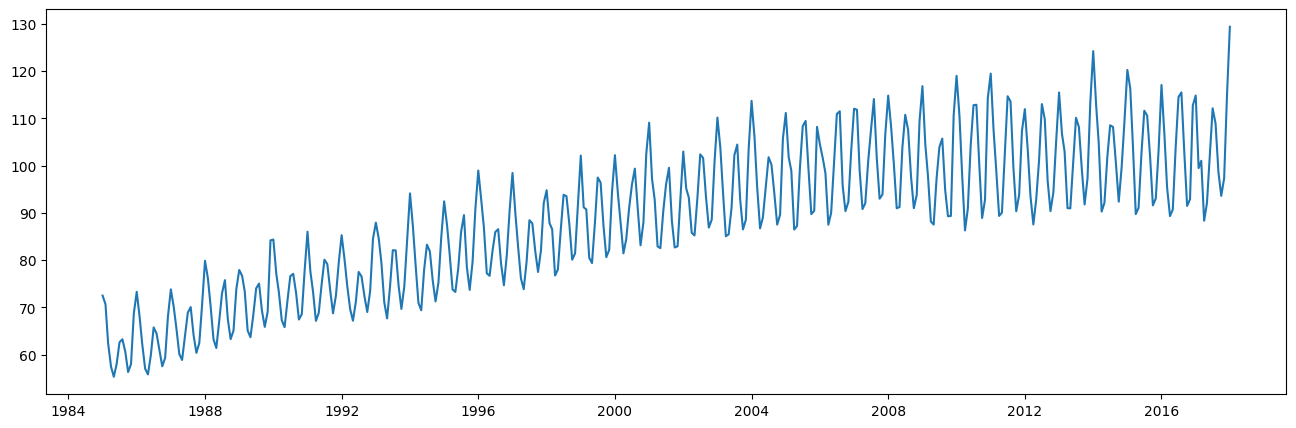

In [ ]:
#plot our series
fig = plt.subplots(figsize=(16, 5))
plt.plot(series)

plt.show()

In [ ]:
#adfuller test to determine whether the data is stationary
# p-value>0.05 indicates non stationarity
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("P-Value : ", dftest[1])

adf_test(series)

P-Value :  0.1862146911658712


In [ ]:
#We will be using auto_arima present in pmdarima library to calculate hyparameters
!pip install pmdarima

from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.3 MB/s eta 0:00:00


In [ ]:
#find best parameters for our model
stepwise_fit = auto_arima(series, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2525.516, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.55 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2449.577, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2431.710, Time=1.58 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2431.461, Time=0.52 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2359.635, Time=0.85 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=2

In [ ]:
#train test split
print(series.shape)
train=series.iloc[:-120]
test=series.iloc[-120:]
print(train.shape,test.shape)

(397, 1)
(277, 1) (120, 1)


In [ ]:
#fit model
!pip install statsmodels
import statsmodels.tsa.arima.model as smt
model = smt.ARIMA(train, order=(2, 1, 4))
model = model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             IPG2211A2N   No. Observations:                  277
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -693.795
Date:                Sat, 06 Apr 2024   AIC                           1401.589
Time:                        14:10:26   BIC                           1426.932
Sample:                    01-01-1985   HQIC                          1411.759
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.003    397.026      0.000       0.995       1.005
ar.L2         -0.9995      0.001   -854.105      0.000      -1.002      -0.997
ma.L1         -1.2933      0.061    -21.231      0.000      -1.413      -1.174
ma.L2          0.9335      0.125      7.467      0.000       0.688       1.179
ma.L3          0.0223      0.102      0.219      0.826      -0.177       0.222
ma.L4         -0.3895      0.077     -5.026      0.000      -0.541      -0.238
sigma2         8.5530      0.904      9.463      0.000       6.782      10.325
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 9.38
Prob(Q):                              0.75   Prob(JB):                         0.01
Heteroskedasticity (H):               1.73   Skew:                             0.25
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
#predict using our model
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


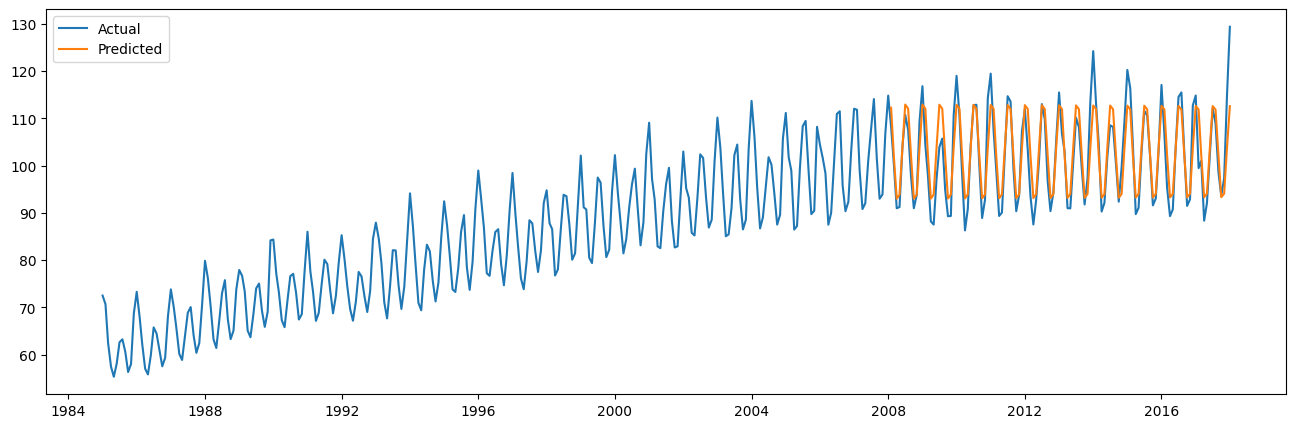

In [24]:
fig = plt.subplots(figsize=(16, 5))
plt.plot(series, label="Actual")
plt.plot(pred,label = "Predicted")
plt.legend()

In [21]:
from sklearn.metrics import mean_absolute_error

In [26]:
#evaluting our model
mae = mean_absolute_error(test,pred)
print(mae)

3.609995746434758
